# Support Vector Machine

Support vector machines (SVMs) are a type of supervised machine learning algorithm that can be used for classification or regression tasks. SVMs are based on the idea of finding a hyperplane in a high-dimensional space that maximally separates different classes.

## Implementing SVM on dataset

Dataset: 
Breast Cancer Wisconsin (Diagnostic) Data Set

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


# Support Vector Classification (SVC)

The goal of SVC is to find the best boundary (also known as a "hyperplane") that separates different classes in a dataset. Once the boundary is found, new data points can be classified based on which side of the boundary they fall on.


## Implementation from scratch

In [29]:
import numpy as np

class SVM:
  def __init__(self, learning_rate, lambda_param, num_iterations):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.num_iter = num_iterations
    self.w = None
    self.b = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.num_iter):
      for idx, x_i in enumerate(X):
        condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
        if (condition.all()):
          self.w -= self.lr * (2* self.lambda_param * self.w)
          self.b -= self.lr * 0
        else:
          self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
          self.b -= self.lr * y[idx]

  def predict(self, X):
    predictions = np.dot(X, self.w) - self.b
    return np.sign(predictions)




`def __init__(self, learning_rate, lambda_param, num_iterations):`

    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.num_iterations = num_iterations
    self.w = None
    self.b = None

this is the constructor method for `SVM` class. When an object of this class is created, this method is called to initialize the object with the specified hyperparameters.

the `__init__` method takes three arguments:



*   `learning_rate`: a float value representing the learning rate to use during training
*   `lambda_param`: a float value representing the regularization parameter to use during training
*    `num_iterations`: an integer value representing the number of iterations to use during training

The method then sets the following instance variables:

*    `self.lr`: the learning rate
*    `self.lambda_param`: the regularization parameter
*    `self.num_iter`: the number of iterations
*    `self.w`: a placeholder for the weight vector (initialized as `None`)
*    `self.b`: a placeholder for the bias value (initialized as `None`)

these instance variables cab be accessed and modified by other methods in the `SVM` class.


we initialized `self.w` and `self.b` as `None` because the values of the weight vector and bias term are not known befor training.

Once the model is trained, this self.w variable will be assigned a numpy array containing the values of the weight vector that maximally separate the different classes. These values are calculated during training using the input data.

Once the training is finished, we can use the weights vector `self.w` along with the bias term `self.b` to make predictions on new input data using the predict method, which will use the dot product of the input and the weight vector and subtract the bias term to calculate the prediction.

 `def fit(self, X, y):`

    n_samples, n_features = X.shape
    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.num_iter):
      for idx, x_1 in enumerate(X):
        condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
        if condition:
          self.w -= self.lr * (2* self.lambda_param * self.w)
          self.b -= self.lr * 0
        else:
          self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
          self.b -= self.lr * y[idx]


The `fit` method is used to train the SVM model on a given dataset. It takes two arguments:
 *    `X`: a numpy array containing the input features of the training data
 *    `y`: a numpy array containing the labels of the training data

 The method begins by initializing the weight vector `self.w` to be a numpy array of zeros with a lenth equal to the number of features, and the bias value `self.b` to be zero.

 Next, the method enters a loop that iterates for a number of times equal to `self.num_iter`, the number of iterations specified in the constructor. On each iteration of the loop, the method loops through each sample in the training data and updates the weight vector and bias value according to following rules:

 *    If the label of the sample is correctly classified by the current weight vector and bias value, do not update the weights.
 *    If the label of the sample is incorrectly classified by the current weight vector and bias value. update the weights accordingly to the gradient of the SVM loss function.

 After the loop completes, the method returns nothing, but the weight vector and bias value will have been updated to values that should better separate the classes in the training data.

 `def predict(self, X):`

    predictions = np.dot(X, self.w) - self.b
    return np.sign(predictions)

  The `predict` method is used to make predictions on new data using the trained SVM model. It takes a single argument:
  *    `X`: a numpy array containing the input features of the data for which you want to make predictions

The method begins by computing the dot product of `X` and the weight vector `self.w`, and subtracting the bias value `self.b`. This result is stored in the `predictions` variable.

The method then applies the `np.sign` function to the `predictions` array, which return an array of values that are either -1, 0, or 1, depending on the sign of the corresponding element in the `predictions` array.

Finally, the method returns the resulting array as the output. In the context of an SVM classifier, the output of this method can be interpreted class labels for the input data.

## Using scikit-learn

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# Split the data into features (X) and labels (y)
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

# Convert the labels to binary values (benign: 0, malignant: 1)
y = np.where(y == 'B', 0, 1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an instance of SVC
svm = SVC(kernel='rbf', C=1, probability=True)

# fit the classifier on the training data
svm.fit(X_train, y_train)

# get the accuracy score on the test set
accuracy = accuracy_score(y_test, svm.predict(X_test))
print("Accuracy: ",accuracy)

Accuracy:  0.9473684210526315


# Support Vector Regression (SVR)

The goal of SVR is to find a boundary that best separates the data points from the target value. Once the boundary is found, new data points can be predicted based on the boundary.

## Implementation from scratch

SVM regressor is implemented using squared epsilon-insensitive loss function.

In [58]:

import numpy as np

class SVM_Regressor:
  
  def __init__(self, learning_rate, lambda_param, num_iterations, epsilon):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.num_iter = num_iterations
    self.epsilon = epsilon
    self.w = None
    self.b = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.w = np.zeros(n_features)
    self.b = 0
    for _ in range(self.num_iter):
      for idx, x_i in enumerate(X):
        residual = y[idx] - (np.dot(x_i, self.w) - self.b)
        if (abs(residual) > self.epsilon).all():
          dw = -2 * self.lambda_param * self.w + x_i * (1 if np.any(residual > 0) else -1)
          db = -1 if np.any(residual >0) else 1
        else:
          dw = -2*self.lambda_param * self.w
          db = 0
        self.w -= self.lr * dw
        self.b -= self.lr * db

  def predict(self, X):
    return np.dot(X, self.w) - self.b

### Epsilon-Insensitive Loss function

Squared epsilon-insensitive loss function is used to measure the difference between the true target values and the predicted values of the model.

`L(y_i, f(x_i)) = max(0, |y_i - f(x_i)| - epsilon)^2`



where `y_i` is the true target value for the i-th sample, `f(x_i)` is the predicted value for the i-th sample, and epsilon is a user-specified hyperparameter.

The loss function is designed to be "insensitive" to small errors in the predictions within a certain range (given by `epsilon`), and it punishes large errors with a squared term.

The loss function has two regions:

*    For predictions that are within `epsilon` of the true target value, the loss is zero. This means that small errors in the predictions are not penalized.
*    For predictions that are farther than `epsilon` from the true target value, the loss is equal to the square of the difference between the prediction and the true target value, minus `epsilon`. This means that large errors in the predictions are heavily penalized.

The epsilon value serves as a parameter that determines the level of tolerance for errors, with a small epsilon resulting in a more sensitive model and more penalties for small errors.

The optimization algorithm adjust the model's parameters such as weights and bias to minimize this loss function over the entire training data set.

 `def fit(self, X, y):`
 
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.num_iter):
            for idx, x_i in enumerate(X):
                residual = y[idx] - (np.dot(x_i, self.w) - self.b)
                if abs(residual) > self.epsilon:
                    dw = -2 * self.lambda_param * self.w + x_i * (1 if residual > 0 else -1)
                    db = -1 if residual > 0 else 1
                else:
                    dw = -2 * self.lambda_param * self.w
                    db = 0
                self.w -= self.lr * dw
                self.b -= self.lr * db

The `fit()` method is used to train the SVM regressor model on the input data. It takes two arguments:

*    `X`: a 2D numpy array representing the input features of the training data
*    `y`: a 1D numpy array representing the target values of the training data

First, the number of samples and features in the input data is determined using the `shape` attribute of the `X` array and stored in the variables `n_samples` and `n_features`, respectively. Then the weight vector `self.w` is initialized to a numpy array of zeros of size `n_features`, and the bias term `self.b` is initialized to zero.

The method then performs a number of iterations specified by the `num_iter` parameter. In each iteration, the method iterates over the input data using a `for` loop, where `enumerate(X)` returns both the index and the element at that index so we can access both the input and the target value for each sample.

For each sample, the residual is calculated as the difference between the true target value and the current prediction, which is the dot product of the input sample and the weight vector minus the bias term.

If the absolute value of the residual is greater than the `epsilon` parameter, the weight vector and bias term are updated using the gradients of the loss function. The gradient of the weight vector `dw` is computed as a negative scalar times the weight vector plus the input sample scaled by either 1 or -1 depending on whether the residual is greater than zero or not. Similarly, the gradient of the bias term `db` is computed as a scalar of either -1 or 1 depending on whether the residual is greater than zero or not.

Otherwise, if the absolute value of the residual is less than or equal to `epsilon`, the weight vector and bias term are not updated.

Finally, the weight vector and bias term are updated by subtracting the corresponding gradients, scaled by the learning rate, from the current values.

In this way, the SVM regressor iteratively updates the weight vector and bias term in order to minimize the squared epsilon-insensitive loss function over the entire training dataset, and eventually we will have a model that can make predictions on new unseen data.

## Using scikit-learn

In [56]:
from sklearn.svm import SVR
# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# Split the data into features (X) and labels (y)
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

# Convert the labels to binary values (benign: 0, malignant: 1)
y = np.where(y == 'B', 0, 1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create an instance of SVR
svr = SVR(kernel='linear', C=1)

# fit the regressor on the training data
svr.fit(X_train, y_train)

# get the mean squared error on the test set
mse = mean_squared_error(y_test, svr.predict(X_test))
print("Mean Squared Error: ",mse)



Mean Squared Error:  0.2072510068890205


Accuracy:  0.9035087719298246


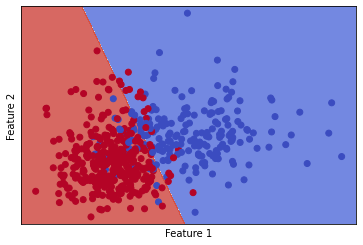

In [53]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load breast cancer dataset
data = load_breast_cancer()
X, y = data.data[:, :2], data.target

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an instance of SVC
svm = SVC(kernel='linear', C=1, probability=True)

# fit the classifier on the training data
svm.fit(X_train, y_train)

# get the accuracy score on the test set
accuracy = accuracy_score(y_test, svm.predict(X_test))
print("Accuracy: ",accuracy)

# Create a mesh grid to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# plot the decision boundary
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
